# 단순 선형 회귀

학생/교사 비율이 보스턴 주택 가격에 미치는 영향 확인하기 (선형 회귀 모델 추정)

In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
from matplotlib import cm
import warnings
warnings.filterwarnings("ignore")

from sklearn.datasets import load_boston
from sklearn.linear_model import LinearRegression
from sklearn.metrics import explained_variance_score, mean_squared_error, mean_absolute_error, r2_score

In [2]:
boston = load_boston()
boston_data = pd.DataFrame(boston.data, columns=boston.feature_names)
boston_target = pd.DataFrame(boston.target, columns=['Target'])
boston = pd.concat([boston_data, boston_target], axis=1)
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


<br>
<br>

## 1. 회귀 모델 생성

PTRATIO (학생/교사 비율)과 target (보스턴 주택 가격) 간의 선형 회귀 모델 추정

X는 2차원의 array 형태여야 하기 때문에 다음 중 하나의 방법으로 변환해준다
- data.reshape(-1, 1): 상수항 미포함
- sm.add_constant(data, has_constant='add'): 상수함 포함

In [3]:
ptratio = sm.add_constant(boston[['PTRATIO']], has_constant='add')
ptratio.head()

,const,PTRATIO
0,1.0,15.3
1,1.0,17.8
2,1.0,17.8
3,1.0,18.7
4,1.0,18.7


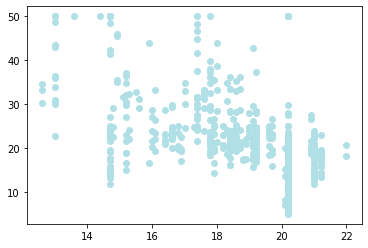

In [4]:
plt.plot(boston[['PTRATIO']], boston_target, 'o', color='powderblue')
plt.show()

<br>

### 1-1. sm.OLS 사용

최소제곱법 OLS로 선형 회귀 모델을 생성한다

In [5]:
model = sm.OLS(boston_target, ptratio)
model_fit1 = model.fit()
model_fit1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Target   R-squared:                       0.258
Model:                            OLS   Adj. R-squared:                  0.256
Method:                 Least Squares   F-statistic:                     175.1
Date:                Fri, 17 Sep 2021   Prob (F-statistic):           1.61e-34
Time:                        00:24:15   Log-Likelihood:                -1764.8
No. Observations:                 506   AIC:                             3534.
Df Residuals:                     504   BIC:                             3542.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         62.3446      3.029     20.581      0.000      56.393      68.296
PTRATIO       -2.1572      0.163    -13.233      0.000      -2.477      -1.837
==============================================================================
Omnibus:                       92.924   Durbin-Watson:                   0.725
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              191.444
Skew:                           1.001   Prob(JB):                     2.68e-42
Kurtosis:                       5.252   Cond. No.                         160.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<br>

**회귀계수** 

In [6]:
model_fit1.params

const      62.344627
PTRATIO    -2.157175
dtype: float64

<br>

### 1-2. sklearn 사용

In [7]:
model = LinearRegression()
model_fit2 = model.fit(np.array(boston['PTRATIO']).reshape(-1, 1), boston_target)
model_fit2

LinearRegression()

<br>

**회귀계수** 

In [8]:
model_fit2.coef_

array([[-2.1571753]])

In [9]:
model_fit2.intercept_

array([62.34462747])

<br>
<br>

## 2. 예측

PTRATIO (학생/교사 비율)과 target (보스턴 주택 가격) 간의 선형 회귀 모델을 사용해 보스턴 주택 가격 예측하기보스턴 주택 가격

In [10]:
def perform_eval(y_true, y_pred):
    print('explained_variance_score: {}'.format(explained_variance_score(y_true, y_pred)))
    print('mean_squared_errors: {}'.format(mean_squared_error(y_true, y_pred)))
    print('r2_score: {}'.format(r2_score(y_true, y_pred)))

<br>

### 2-1. sm.OLS 사용

In [11]:
pred1 = model_fit1.predict(ptratio)

In [12]:
np.dot(ptratio, model_fit1.params)[:10]

array([29.33984545, 23.9469072 , 23.9469072 , 22.00544944, 22.00544944,
       22.00544944, 29.55556297, 29.55556297, 29.55556297, 29.55556297])

In [13]:
sum((boston['Target'] - pred1)**2) / (len(ptratio))

62.65220001376924

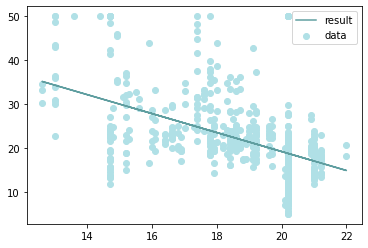

In [14]:
plt.scatter(boston[['PTRATIO']], boston_target, color='powderblue', label='data')
plt.plot(boston[['PTRATIO']], pred1, label='result', color='cadetblue')
plt.legend()
plt.show()

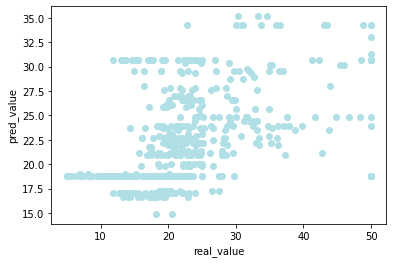

In [15]:
plt.scatter(boston['Target'], pred1, color='powderblue')
plt.xlabel('real_value')
plt.ylabel('pred_value')
plt.show()

<AxesSubplot:>

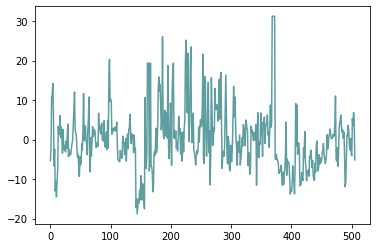

In [16]:
model_fit1.resid.plot(color='cadetblue')

In [17]:
perform_eval(boston_target, pred1)

explained_variance_score: 0.257847318009223
mean_squared_errors: 62.652200013769274
r2_score: 0.257847318009223


<br>

### 2-2. sklearn 사용

In [18]:
model_fit2.predict([[25]])

array([[8.41524507]])

In [19]:
pred2 = model_fit2.predict(np.array(boston['PTRATIO']).reshape(-1, 1))
pred2[:10]

array([[29.33984545],
       [23.9469072 ],
       [23.9469072 ],
       [22.00544944],
       [22.00544944],
       [22.00544944],
       [29.55556297],
       [29.55556297],
       [29.55556297],
       [29.55556297]])

In [20]:
model_fit2.score(np.array(boston['PTRATIO']).reshape(-1, 1), boston_target)

0.257847318009223

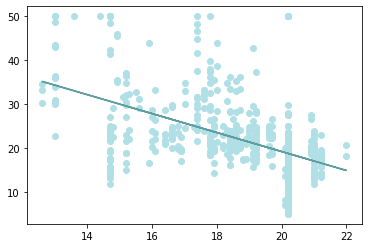

In [21]:
plt.plot(boston['PTRATIO'], boston_target, 'o', color='powderblue')
plt.plot(boston['PTRATIO'], pred2, color='cadetblue')
plt.show()

In [22]:
perform_eval(boston_target, pred2)

explained_variance_score: 0.257847318009223
mean_squared_errors: 62.652200013769274
r2_score: 0.257847318009223


<br>

---

<br>

## 결론

MSE가 높은 반면 R2는 낮은 결과를 확인할 수 있다. 


- 학생/교사 비율이 보스턴 주택 가격에 미치는 영향은 유의미하다.
- 하지만 예측 정확도가 26% 정도이며 이는 학생/교사 비율만으로 보스턴 주택 가격을 예측하는 것은 쉽지 않다는 것을 의미한다고 볼 수 있다.